Name :- Riza James Peter

Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Create Dataset for academic performance
name = {'Name': ['Riza','Sakshi','Ritvi','Riya','Rohan','Shubham','Rithik','Yash','Ram','Riddhi','Ritu','Radha','Sushant','Sameer','Sagar','Shreyash'],
        'Year': [2024, 2021,2022,None,2021,2024,2020,2010,2015,2010,2024,1997,1987,1996,2023,2024],
        'DSBDA':[90,93,80,89,42,45,50,None,60,65,70,80,39,20,90,65],
        'AI':   [89,52,65,32,40,45,45,None,85,95,75,65,35,25,14,55],
        'Cloud computing':[50,45,96,75,60,None,12,30,54,60,85,25,58,23,55,40],
        'Web':[85,75,69,55,45,32,25,55,45,78,None,45,89,58,60,39]}
data = pd.DataFrame(name,columns=['Name','Year','DSBDA','AI','Cloud computing','Web'])
print(data.head())


     Name    Year  DSBDA    AI  Cloud computing   Web
0    Riza  2024.0   90.0  89.0             50.0  85.0
1  Sakshi  2021.0   93.0  52.0             45.0  75.0
2   Umama  2022.0   80.0  65.0             96.0  69.0
3    Riya     NaN   89.0  32.0             75.0  55.0
4   Rohan  2021.0   42.0  40.0             60.0  45.0


In [ ]:
#scaning for missing values and inconsistencies
print(data.isnull().sum())

Name               0
Year               1
DSBDA              1
AI                 1
Cloud computing    1
Web                1
dtype: int64


In [ ]:
#Dropping rows with null values
new_data=data.dropna()
print(new_data.head())

     Name    Year  DSBDA    AI  Cloud computing   Web
0    Riza  2024.0   90.0  89.0             50.0  85.0
1  Sakshi  2021.0   93.0  52.0             45.0  75.0
2   Umama  2022.0   80.0  65.0             96.0  69.0
4   Rohan  2021.0   42.0  40.0             60.0  45.0
6  Rithik  2020.0   50.0  45.0             12.0  25.0


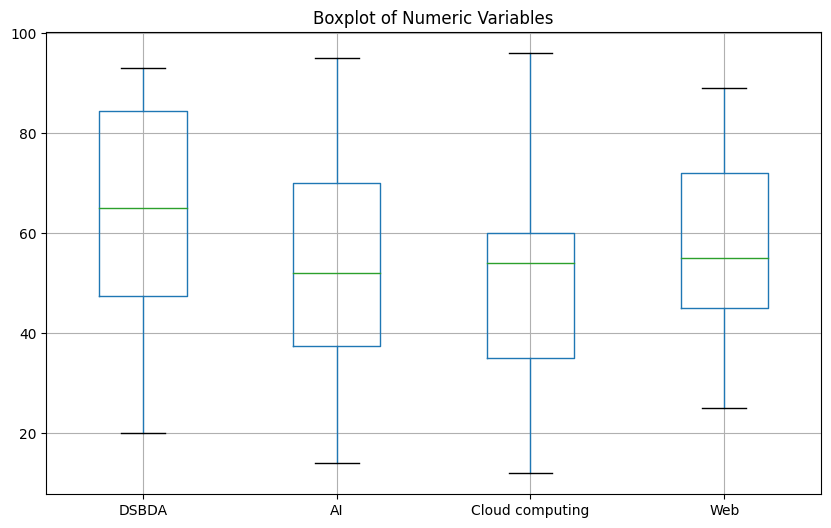

In [ ]:
# Visualize numeric variables to identify outliers (boxplot)
plt.figure(figsize=(10, 6))
boxplot = data.boxplot(column=['DSBDA', 'AI', 'Cloud computing', 'Web'])
plt.title('Boxplot of Numeric Variables')
plt.show()

<Axes: >

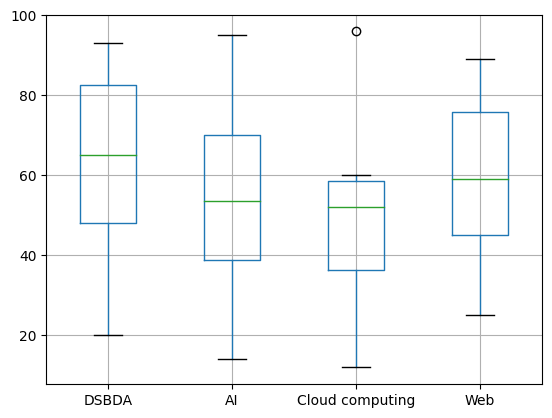

In [ ]:
new_data[['DSBDA', 'AI', 'Cloud computing', 'Web']].boxplot()

In [ ]:
new_data.head()

,Name,Year,DSBDA,AI,Cloud computing,Web
0,Riza,2024.0,90.0,89.0,50.0,85.0
1,Sakshi,2021.0,93.0,52.0,45.0,75.0
2,Umama,2022.0,80.0,65.0,96.0,69.0
4,Rohan,2021.0,42.0,40.0,60.0,45.0
6,Rithik,2020.0,50.0,45.0,12.0,25.0


In [ ]:
#to rename the column names
new_data.rename(columns={'Web': 'WT'}, inplace=True)


<ipython-input-7-e60b7172e76c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.rename(columns={'Web': 'WT'}, inplace=True)


In [ ]:
new_data.head()

,Name,Year,DSBDA,AI,Cloud computing,WT
0,Riza,2024.0,90.0,89.0,50.0,85.0
1,Sakshi,2021.0,93.0,52.0,45.0,75.0
2,Umama,2022.0,80.0,65.0,96.0,69.0
4,Rohan,2021.0,42.0,40.0,60.0,45.0
6,Rithik,2020.0,50.0,45.0,12.0,25.0


In [ ]:
import heapq

class Node:
    def __init__(self, position, parent=None, cost=0, heuristic=0):
        self.position = position
        self.parent = parent
        self.cost = cost
        self.heuristic = heuristic
        self.total_cost = cost + heuristic

    def __lt__(self, other):
        return self.total_cost < other.total_cost

def heuristic(current_pos, end_pos):
    # Manhattan distance heuristic
    return abs(current_pos[0] - end_pos[0]) + abs(current_pos[1] - end_pos[1])

def get_neighbors(current_pos, maze):
    neighbors = []
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]  # Right, Left, Down, Up

    for direction in directions:
        new_row = current_pos[0] + direction[0]
        new_col = current_pos[1] + direction[1]

        if 0 <= new_row < len(maze) and 0 <= new_col < len(maze[0]) and maze[new_row][new_col] != '#':
            neighbors.append((new_row, new_col))

    return neighbors

def astar(start_pos, end_pos, maze):
    frontier = []
    explored = set()

    start_node = Node(start_pos, cost=0, heuristic=heuristic(start_pos, end_pos))
    heapq.heappush(frontier, start_node)

    while frontier:
        current_node = heapq.heappop(frontier)

        if current_node.position == end_pos:
            return build_path(current_node)

        explored.add(current_node.position)

        for next_pos in get_neighbors(current_node.position, maze):
            new_cost = current_node.cost + 1  # Assuming each move has a cost of 1
            new_node = Node(next_pos, current_node, new_cost, heuristic(next_pos, end_pos))

            if next_pos not in explored:
                heapq.heappush(frontier, new_node)

    return None

def build_path(node):
    path = []
    while node:
        path.append(node.position)
        node = node.parent
    return list(reversed(path))

# Example maze
maze = [
    ['S', '.', '.', '#', '.', '.'],
    ['#', '#', '.', '#', '.', '#'],
    ['.', '.', '.', '.', '.', '.'],
    ['#', '.', '#', '#', '#', '#'],
    ['.', '.', '.', '.', '.', 'E']
]

start_pos = (0, 0)  # Start position
end_pos = (4, 5)    # End position

path = astar(start_pos, end_pos, maze)
if path:
    print("Path found:", path)
else:
    print("No path found.")


Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)]


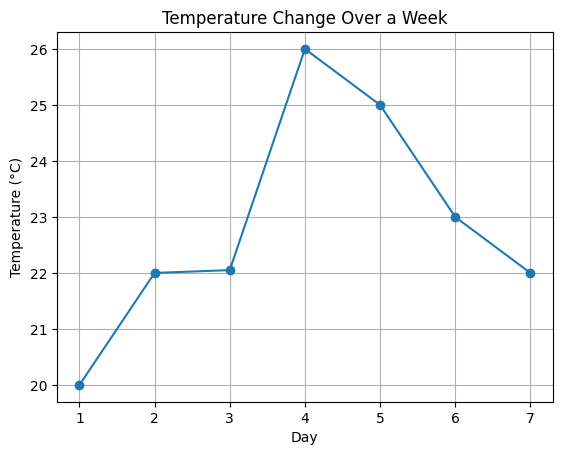

In [ ]:
import matplotlib.pyplot as plt

# Example data (temperature over a week)
days = [1, 2, 3, 4, 5, 6, 7]
temperature = [20, 22, 22, 26, 25, 23, 22]

# Line plot
plt.plot(days, temperature, marker='o')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Change Over a Week')
plt.grid(True)
plt.show()

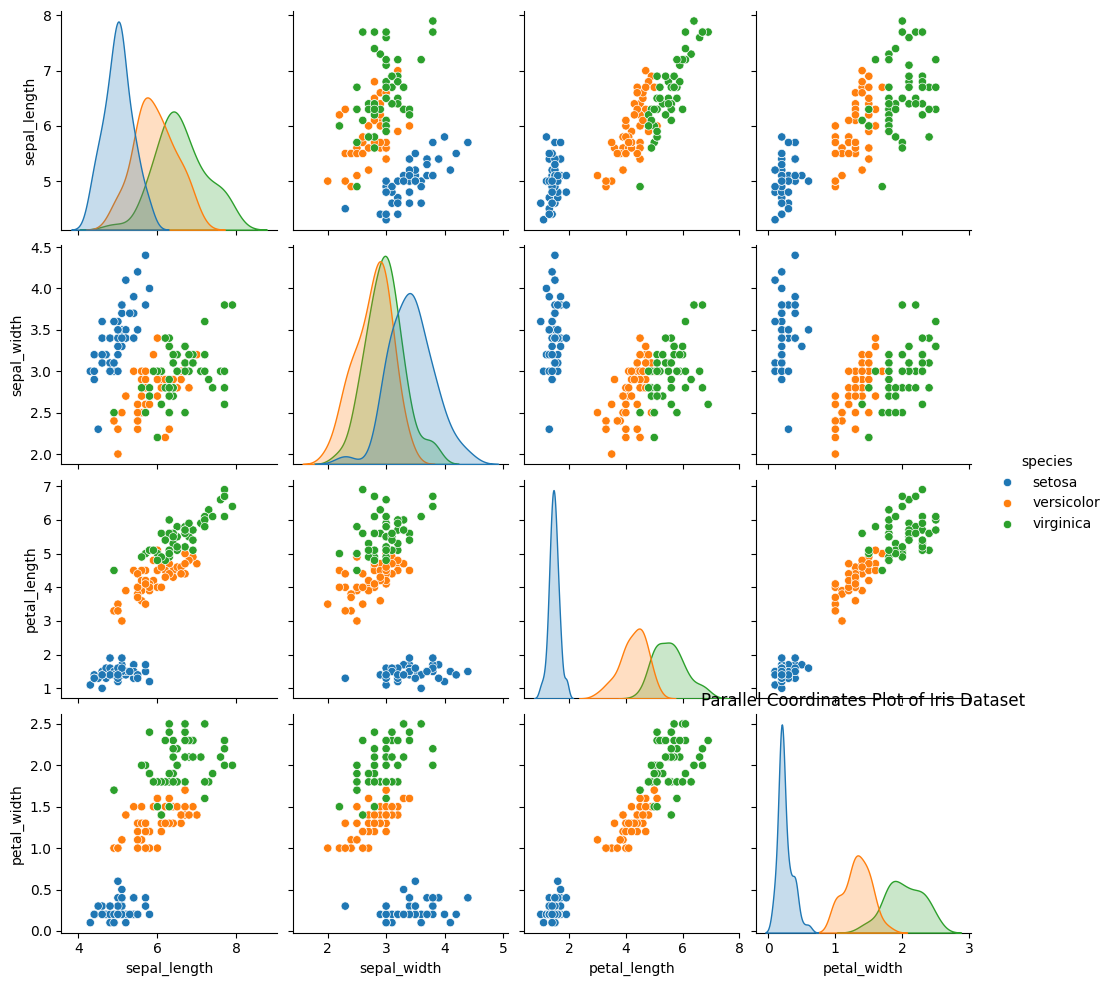

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = sns.load_dataset('iris')

# Parallel coordinates plot
sns.pairplot(data, hue='species')
plt.title('Parallel Coordinates Plot of Iris Dataset')
plt.show()

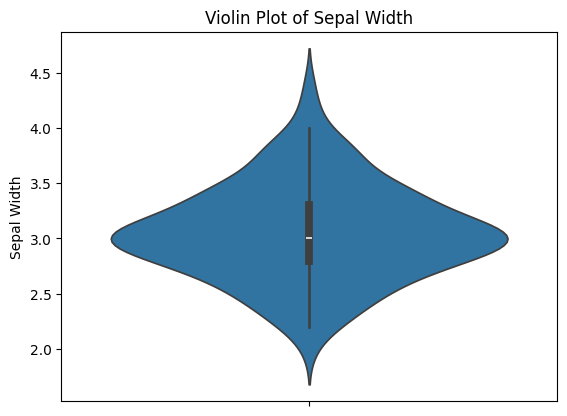

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = sns.load_dataset('iris')

# Violin plot
sns.violinplot(data['sepal_width'])
plt.title('Violin Plot of Sepal Width')
plt.ylabel('Sepal Width')
plt.show()


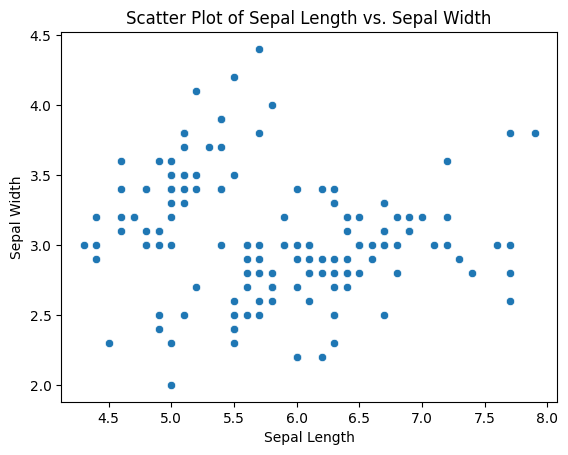

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = sns.load_dataset('iris')

# Scatter plot
sns.scatterplot(x='sepal_length', y='sepal_width', data=data)
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()